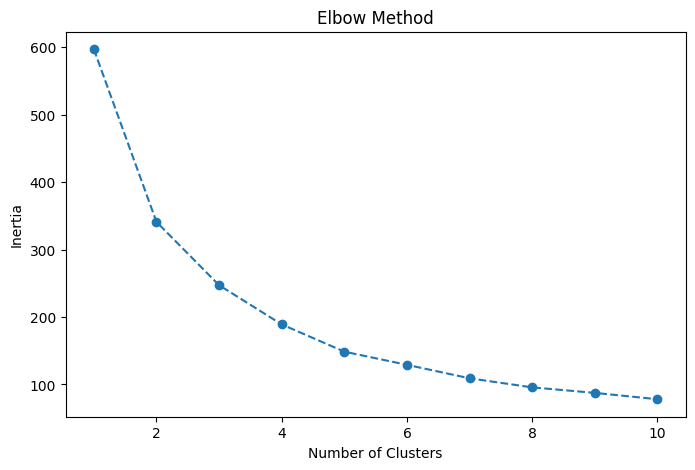

Customer segmentation saved to 'FirstName_LastName_Segmentation.csv'


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

# ---- Data Preparation ----
# Merge datasets
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Aggregate transaction data to create customer-level features
customer_features = merged.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AverageSpend=('TotalValue', 'mean'),
    TotalTransactions=('TransactionID', 'count')
).reset_index()

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpend', 'AverageSpend', 'TotalTransactions']])

# ---- Determine Optimal Number of Clusters ----
# Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# ---- Clustering ----
# Based on the Elbow Curve, select an appropriate number of clusters (e.g., k=3)
k = 3  # Change this based on the Elbow Curve result
kmeans = KMeans(n_clusters=k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# ---- Save Segmentation Results ----
customer_features.to_csv("FirstName_LastName_Segmentation.csv", index=False)
print("Customer segmentation saved to 'FirstName_LastName_Segmentation.csv'")


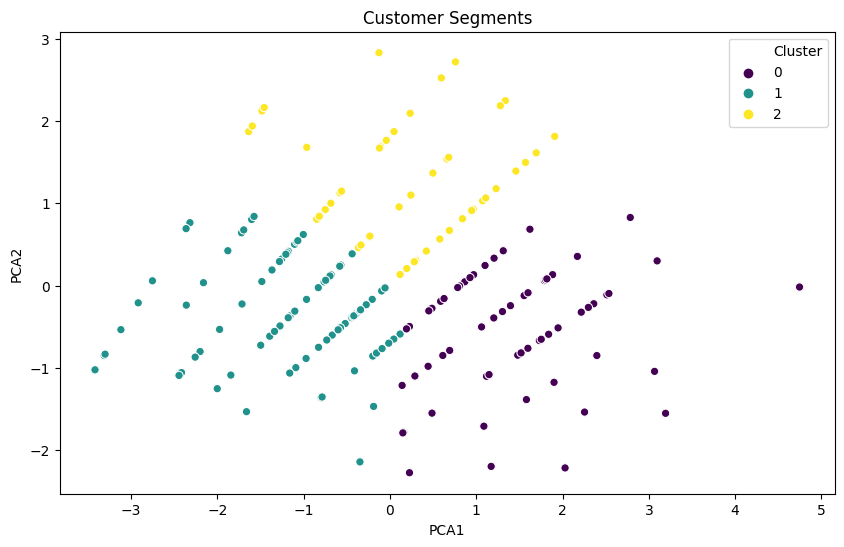

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis')
plt.title("Customer Segments")
plt.show()


In [3]:
import pandas as pd

lookalike_output = pd.read_csv("FirstName_LastName_Segmentation.csv")
print(lookalike_output.head())


  CustomerID  TotalSpend  AverageSpend  TotalTransactions  Cluster
0      C0001     3354.52       670.904                  5        1
1      C0002     1862.74       465.685                  4        1
2      C0003     2725.38       681.345                  4        1
3      C0004     5354.88       669.360                  8        0
4      C0005     2034.24       678.080                  3        1
